In [1]:
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#NLP - TFIDF
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors


#BERT
from transformers import BertTokenizer, BertModel
import torch
from transformers import DistilBertTokenizer, DistilBertModel
from wordcloud import WordCloud


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\dell\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



RuntimeError: Failed to import transformers.models.bert.modeling_bert because of the following error (look up to see its traceback):
numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [3]:
df = pd.read_csv(filepath_or_buffer = r"C:\Users\dell\Desktop\MyDocs\Docs\MK\udemy_courses.csv")
df

,id,title,url,is_paid,instructor_names,category,headline,num_subscribers,rating,num_reviews,instructional_level,objectives,curriculum
0,567828,The Complete Python Bootcamp From Zero to Hero...,https://www.udemy.com/course/complete-python-b...,True,"Jose Portilla, Pierian Training",Development,Learn Python like a Professional Start from t...,1976866,4.576494,521219,All Levels,You will learn how to leverage the power of Py...,"Course Overview, Auto-Welcome Message, Course ..."
1,1565838,The Complete 2024 Web Development Bootcamp,https://www.udemy.com/course/the-complete-web-...,True,"Dr. Angela Yu, Developer and Lead Instructor",Development,Become a Full-Stack Web Developer with just ON...,1362586,4.679065,409793,All Levels,Build 16 web development projects for your por...,"Front-End Web Development, What You'll Get in ..."
2,2776760,100 Days of Code: The Complete Python Pro Boot...,https://www.udemy.com/course/100-days-of-code/,True,"Dr. Angela Yu, Developer and Lead Instructor",Development,Master Python by building 100 projects in 100 ...,1417942,4.698768,331803,All Levels,You will master the Python programming languag...,Day 1 - Beginner - Working with Variables in P...
3,625204,The Web Developer Bootcamp 2024,https://www.udemy.com/course/the-web-developer...,True,Colt Steele,Development,10 Hours of React just added. Become a Develop...,923815,4.673450,276723,All Levels,"The ins and outs of HTML5, CSS3, and Modern Ja...","Course Orientation, Welcome To The Course!, Jo..."
4,1362070,React - The Complete Guide 2024 (incl. Next.js...,https://www.udemy.com/course/react-the-complet...,True,"Academind by Maximilian Schwarzmüller, Maximil...",Development,Dive in and learn React.js from scratch! Learn...,909848,4.638643,220051,All Levels,Learn React from the ground up and finish the ...,"Getting Started, Welcome To The Course!, What ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98099,115328,LinkedIn Career Success Starter for High Schoo...,https://www.udemy.com/course/linkedin-career-s...,True,Barbara Rozgonyi,Teaching & Academics,"Discover how personal branding, 3D networking,...",60,4.256361,4,Beginner Level,"By the end of the course, you will be building...","Introduction and Guide, Welcome! A Brief Cours..."
98100,3789828,2 Minute French Whisperer Advanced - Course 4 ...,https://www.udemy.com/course/2-minute-french-w...,True,Christian Aubert,Teaching & Academics,280 French lessons to understand French in Fre...,117,5.000000,4,Intermediate Level,Learn to speak French at the speed French acto...,"280 French film dialog excerpts, Introduction,..."
98101,6043978,Introduction to Biology of Aging,https://www.udemy.com/course/introduction-to-b...,True,Dr. Gabriele Morabito,Teaching & Academics,biological forces leading human aging and trea...,6,5.000000,4,All Levels,Definition of human aging and link to cellular...,"Introduction to the course, Welcome and Introd..."
98102,5525778,Mastering Schematics Electrical Drawings Episo...,https://www.udemy.com/course/mastering-schemat...,True,Elite Engineering,Teaching & Academics,"Learn from Professionals, Electrical Power Eng...",49,4.088524,4,Intermediate Level,Different types of timers Close command and cl...,"Introduction, Introduction, Normally Open Time..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98104 entries, 0 to 98103
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   98104 non-null  int64  
 1   title                98104 non-null  object 
 2   url                  98104 non-null  object 
 3   is_paid              98104 non-null  bool   
 4   instructor_names     98102 non-null  object 
 5   category             98104 non-null  object 
 6   headline             98104 non-null  object 
 7   num_subscribers      98104 non-null  int64  
 8   rating               98104 non-null  float64
 9   num_reviews          98104 non-null  int64  
 10  instructional_level  98104 non-null  object 
 11  objectives           98104 non-null  object 
 12  curriculum           98104 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 9.1+ MB
None

Number of Missing Values:
id                     0
title        

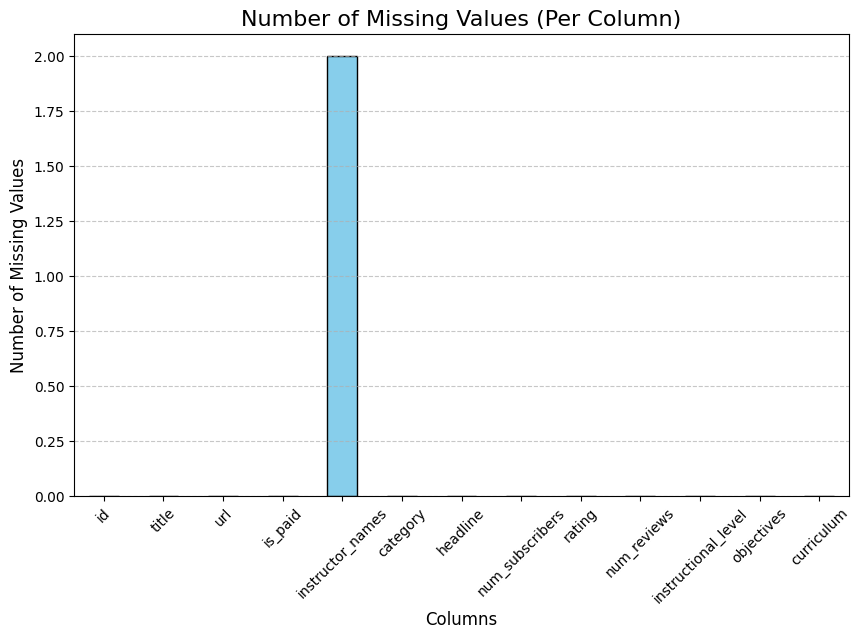

In [4]:
# Check data types and missing values
print(df.info())
print("\nNumber of Missing Values:")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 6))
df.isnull().sum().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Missing Values (Per Column)", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Missing Values", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [5]:
missing_instructor_rows = df[df['instructor_names'].isnull()]
missing_instructor_rows

,id,title,url,is_paid,instructor_names,category,headline,num_subscribers,rating,num_reviews,instructional_level,objectives,curriculum
60984,492448,Unlock the Power of Search Engine Optimization,https://www.udemy.com/course/search-engine-opt...,True,NaN,Marketing,The Secret to Getting Found Online: A Step-by-...,10343,3.994410,145,Beginner Level,How To Optimize Your Website and Blog For Sear...,"Introduction, Shout Out From Instructor and Re..."
70152,3706028,Master course in watercolor painting,https://www.udemy.com/course/botanical-water-c...,True,NaN,Lifestyle,"Painting eye, nose, ear, hair, cherries, still...",233,3.744597,12,Beginner Level,Water colour painting,"Basics of water color painting, Materials requ..."


In [6]:
# Fill missing values in 'instructor_names' with 'Unknown'
df['instructor_names'] = df['instructor_names'].fillna('Unknown')

# Verify the changes
df.isnull().sum()

id                     0
title                  0
url                    0
is_paid                0
instructor_names       0
category               0
headline               0
num_subscribers        0
rating                 0
num_reviews            0
instructional_level    0
objectives             0
curriculum             0
dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_4632\494135287.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')


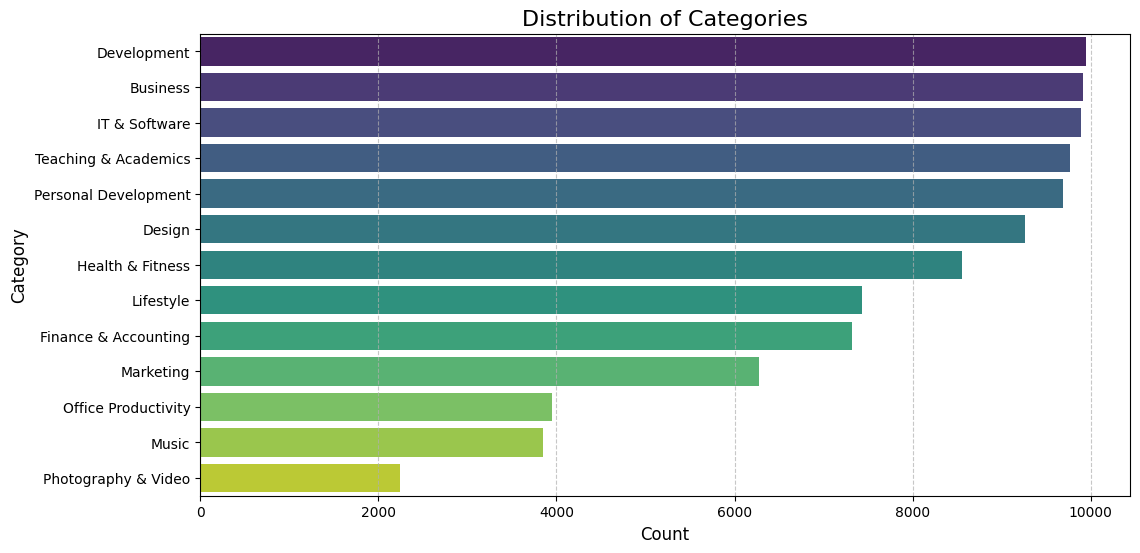

C:\Users\dell\AppData\Local\Temp\ipykernel_4632\494135287.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_paid', palette='coolwarm')


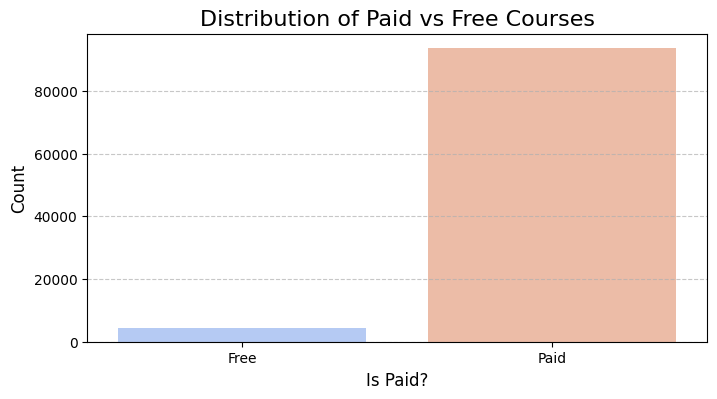

C:\Users\dell\AppData\Local\Temp\ipykernel_4632\494135287.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='instructional_level', order=df['instructional_level'].value_counts().index, palette='magma')


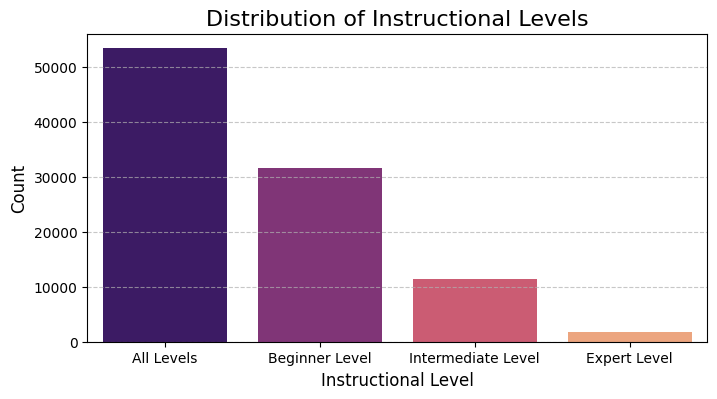

In [7]:
# Plot for 'category'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')
plt.title('Distribution of Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Plot for 'is_paid'
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='is_paid', palette='coolwarm')
plt.title('Distribution of Paid vs Free Courses', fontsize=16)
plt.xlabel('Is Paid?', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([0, 1], labels=["Free", "Paid"])
plt.show()

# Plot for 'instructional_level'
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='instructional_level', order=df['instructional_level'].value_counts().index, palette='magma')
plt.title('Distribution of Instructional Levels', fontsize=16)
plt.xlabel('Instructional Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Top 10 Instructors with Most Courses:
instructor_names
Dr. José Prabhu J              289
EDUCBA Bridging the Gap        273
Simon Sez IT                   266
Dr. Dheeraj Mehrotra           263
Packt Publishing               254
Infinite Skills                232
Pradeep Aggarwal               223
Bluelime Learning Solutions    221
Stone River eLearning          219
HowExpert                      207
Name: count, dtype: int64


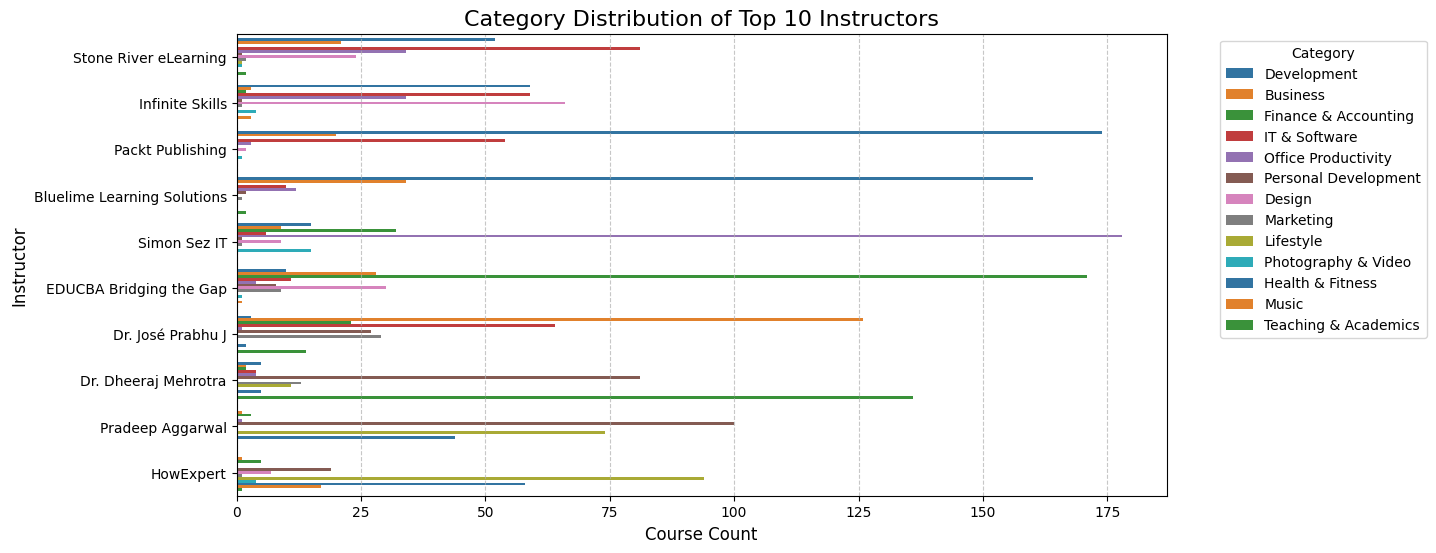

In [8]:
# Step 1: Find the top instructors with the most courses
top_instructors = df['instructor_names'].value_counts().head(10)
print("Top 10 Instructors with Most Courses:")
print(top_instructors)

# Step 2: Analyze categories for these top instructors
# Filter the dataset for top instructors
top_instructors_list = top_instructors.index
filtered_df = df[df['instructor_names'].isin(top_instructors_list)]

# Plot category distribution for top instructors
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, y='instructor_names', hue='category', palette='tab10')
plt.title('Category Distribution of Top 10 Instructors', fontsize=16)
plt.xlabel('Course Count', fontsize=12)
plt.ylabel('Instructor', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

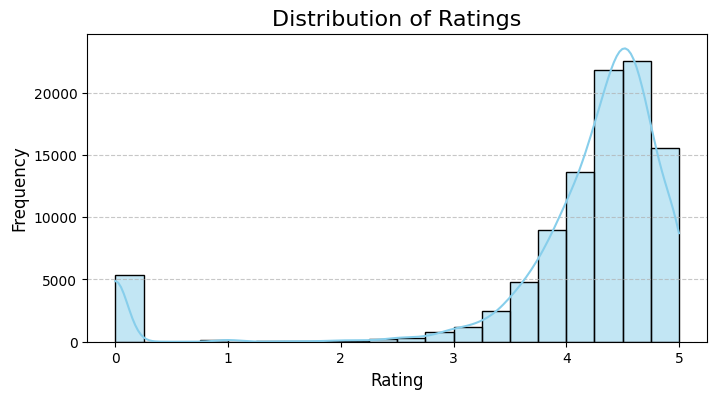

Average Rating: 4.09
Minimum Rating: 0.0
Maximum Rating: 5.0000005

Lowest Rated Courses:


,title,category,rating
25638,Learn Forex Trading From Scratch,Finance & Accounting,0.0
25639,Special Purpose Entities (SPEs) and Structured...,Finance & Accounting,0.0
25640,"Mastering Cryptocurrency: Understanding, Inves...",Finance & Accounting,0.0
25641,Smart Money ICT Swing Trading Course,Finance & Accounting,0.0
25642,Time Value of Money,Finance & Accounting,0.0
...,...,...,...
88336,"Audio Editing For First Time Podcasters, Conte...",Music,0.0
88337,LEARN MASCHINE MK3 FAST! - CAN YOU SOLVE THIS ...,Music,0.0
88338,Launch loops with these pads,Music,0.0
88339,Using Akai's APC64 Hardware Controller with Ab...,Music,0.0



Highest Rated Courses:


,title,category,rating
25170,Trade the Stock Market using Relative Strength...,Finance & Accounting,5.0
25525,Binance Futures 2way Strategy - A Market Neutr...,Finance & Accounting,5.0
25598,CIMA (E1) Managing Finance in a Digital World ...,Finance & Accounting,5.0
49764,Rider-Waite Tarot in Relationships,Personal Development,5.0
50134,2. The Place Of Prayer,Personal Development,5.0
50263,How To Find Your Profitable Niche As A New Coa...,Personal Development,5.0
50436,The INTP Productivity Improvement Guide,Personal Development,5.0
50503,The Path to Happiness,Personal Development,5.0
50526,How to prepare yourself for job interview?,Personal Development,5.0
50627,The Neuroscience for the Adaptive Conscious Le...,Personal Development,5.0


Number of courses with the lowest rating: 5355
Number of courses with the highest rating: 28


In [9]:
# Distribution of ratings
plt.figure(figsize=(8, 4))
sns.histplot(df['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate average, minimum, and maximum ratings
average_rating = df['rating'].mean()
min_rating = df['rating'].min()
max_rating = df['rating'].max()

print(f"Average Rating: {average_rating:.2f}")
print(f"Minimum Rating: {min_rating}")
print(f"Maximum Rating: {max_rating}")

# Filter courses with minimum and maximum ratings
lowest_rated_courses_df = df[df['rating'] == min_rating][['title', 'category', 'rating']]
highest_rated_courses_df = df[df['rating'] == max_rating][['title', 'category', 'rating']]

# Display the courses with the lowest and highest ratings
print("\nLowest Rated Courses:")
display(lowest_rated_courses_df)

print("\nHighest Rated Courses:")
display(highest_rated_courses_df)

# Count the number of records in each DataFrame
num_lowest_rated = len(lowest_rated_courses_df)
num_highest_rated = len(highest_rated_courses_df)

# Print the counts
print(f"Number of courses with the lowest rating: {num_lowest_rated}")
print(f"Number of courses with the highest rating: {num_highest_rated}")

C:\Users\dell\AppData\Local\Temp\ipykernel_4632\4285124471.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=highest_rated_category_df, x='Category', y='Number of Courses', palette='viridis')


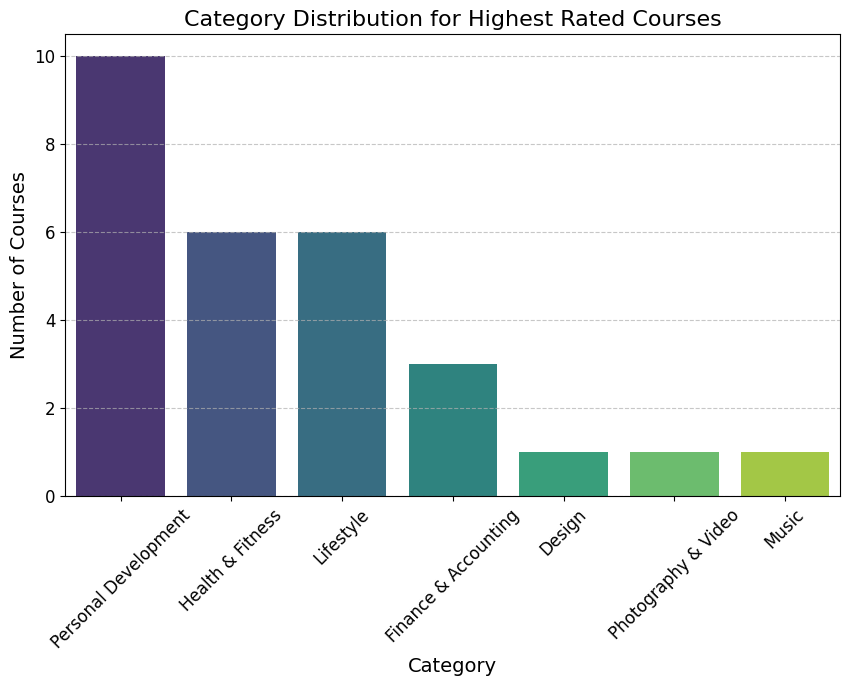

In [10]:
# Counting the categories for highest rated courses
highest_rated_category_counts = highest_rated_courses_df['category'].value_counts()

# Converting to a DataFrame for better visualization
highest_rated_category_df = highest_rated_category_counts.reset_index()
highest_rated_category_df.columns = ['Category', 'Number of Courses']

# Displaying the resulting DataFrame
highest_rated_category_df

# Visualizing the distribution of categories for highest rated courses
plt.figure(figsize=(10, 6))
sns.barplot(data=highest_rated_category_df, x='Category', y='Number of Courses', palette='viridis')
plt.title('Category Distribution for Highest Rated Courses', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Courses', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_4632\1287368377.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lowest_rated_category_df, x='Category', y='Number of Courses', palette='magma')


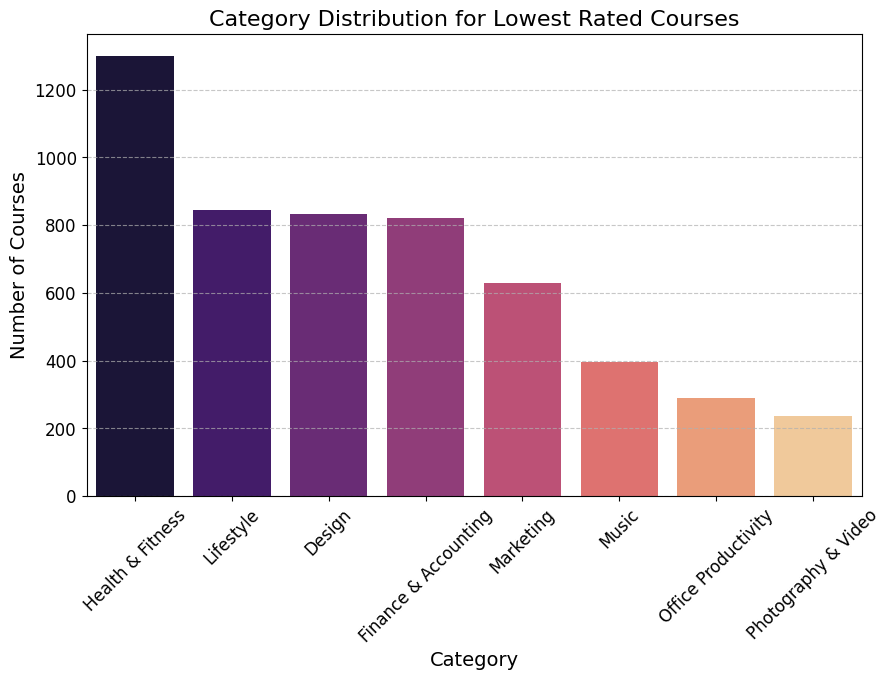

In [11]:
# Counting the categories for lowest rated courses
lowest_rated_category_counts = lowest_rated_courses_df['category'].value_counts()

# Converting to a DataFrame for better visualization
lowest_rated_category_df = lowest_rated_category_counts.reset_index()
lowest_rated_category_df.columns = ['Category', 'Number of Courses']

# Displaying the resulting DataFrame
lowest_rated_category_df

# Visualizing the distribution of categories for lowest rated courses
plt.figure(figsize=(10, 6))
sns.barplot(data=lowest_rated_category_df, x='Category', y='Number of Courses', palette='magma')
plt.title('Category Distribution for Lowest Rated Courses', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Courses', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

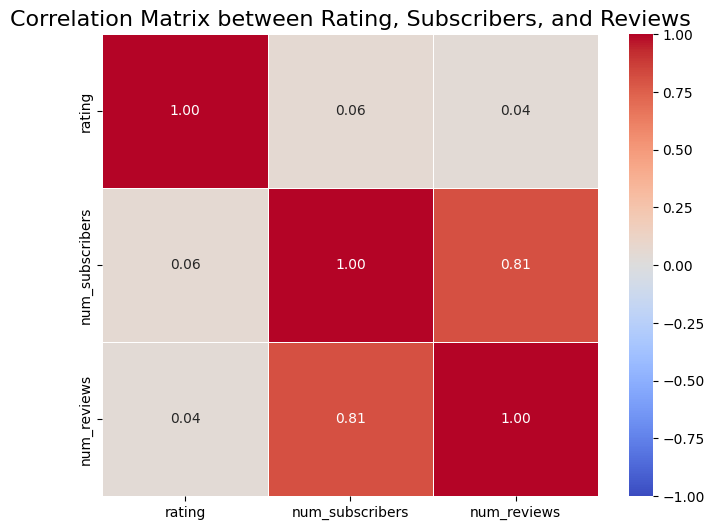

In [12]:
# Select the necessary columns for correlation calculation
correlation_data = df[['rating', 'num_subscribers', 'num_reviews']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Rating, Subscribers, and Reviews', fontsize=16)
plt.show()

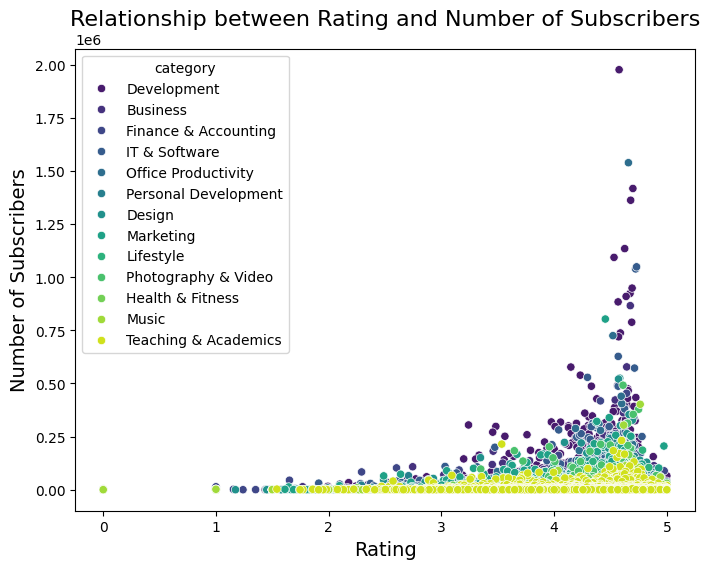

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='rating', y='num_subscribers', hue='category', palette='viridis')
plt.title('Relationship between Rating and Number of Subscribers', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Number of Subscribers', fontsize=14)
plt.show()

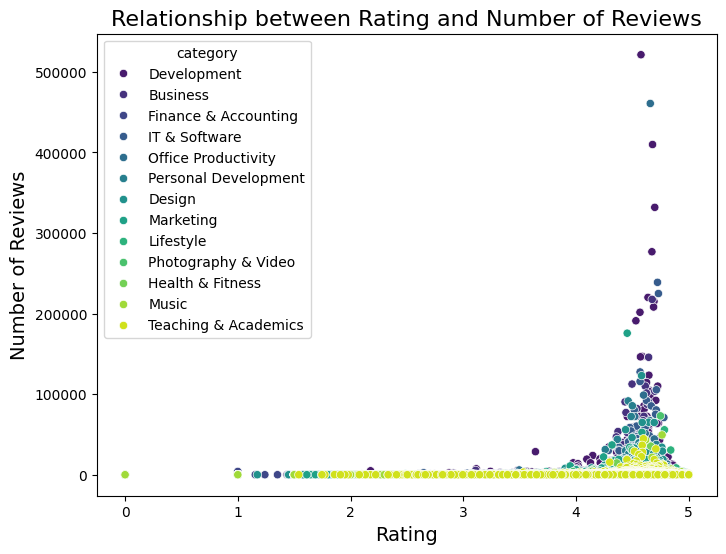

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='rating', y='num_reviews', hue='category', palette='viridis')
plt.title('Relationship between Rating and Number of Reviews', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.show()

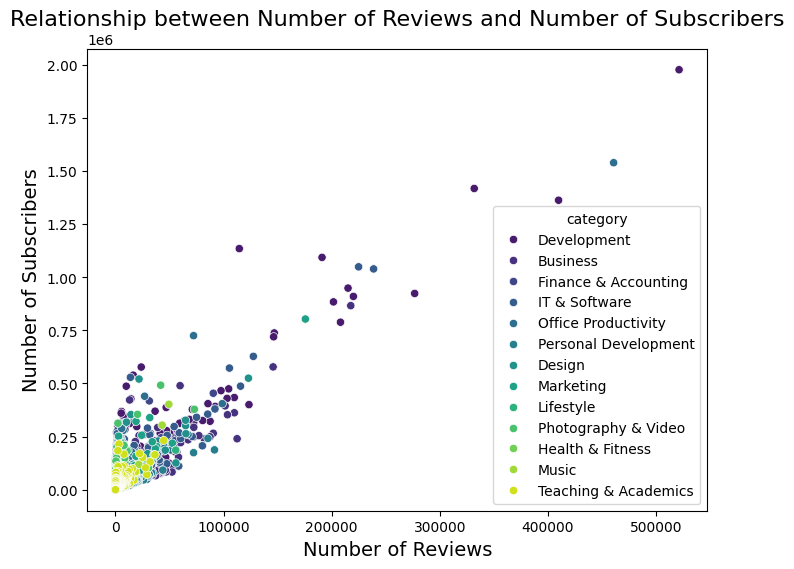

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='num_reviews', y='num_subscribers', hue='category', palette='viridis')
plt.title('Relationship between Number of Reviews and Number of Subscribers', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Number of Subscribers', fontsize=14)
plt.show()

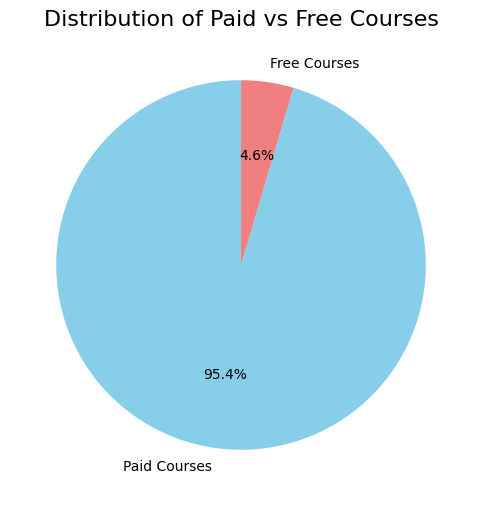

is_paid
True     93607
False     4497
Name: count, dtype: int64

In [16]:
payment_status_counts = df['is_paid'].value_counts()

# Plotting a pie chart for paid vs free courses with more meaningful labels
plt.figure(figsize=(8, 6))
plt.pie(payment_status_counts, labels=['Paid Courses', 'Free Courses'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Paid vs Free Courses', fontsize=16)
plt.ylabel('', fontsize=14)  # Hides the y-axis label as it's not necessary for pie charts
plt.show()

# Displaying the counts of paid and free courses
payment_status_counts

In [17]:
payment_status_counts = df['is_paid'].value_counts()

# Mapping the result to more meaningful labels
payment_status_counts.index = payment_status_counts.index.map({True: 'Paid Courses', False: 'Free Courses'})

# Displaying the counts of paid and free courses
payment_status_counts

is_paid
Paid Courses    93607
Free Courses     4497
Name: count, dtype: int64

In [18]:
avg_subscribers_paid_free = df.groupby('is_paid')['num_subscribers'].mean()

# Renaming the index to more meaningful labels
avg_subscribers_paid_free.index = ['Free Courses', 'Paid Courses']

# Displaying the result
avg_subscribers_paid_free

Free Courses    7665.997554
Paid Courses    5674.461632
Name: num_subscribers, dtype: float64

C:\Users\dell\AppData\Local\Temp\ipykernel_4632\2474986755.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=paid_courses_category_df, x='Category', y='Number of Courses', palette='viridis')


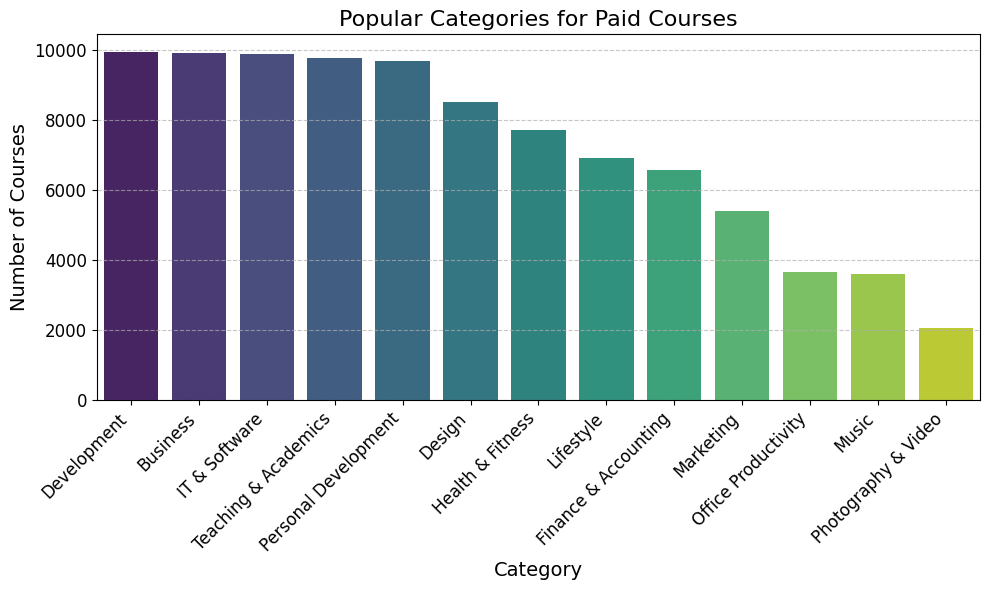

In [19]:
paid_courses_df = df[df['is_paid'] == True]

# Counting the number of courses in each category for paid courses
paid_courses_category_counts = paid_courses_df['category'].value_counts()

# Converting the result to a DataFrame for better visualization
paid_courses_category_df = paid_courses_category_counts.reset_index()
paid_courses_category_df.columns = ['Category', 'Number of Courses']

# Displaying the result
paid_courses_category_df

# Visualizing the distribution of categories for paid courses
plt.figure(figsize=(10, 6))
sns.barplot(data=paid_courses_category_df, x='Category', y='Number of Courses', palette='viridis')
plt.title('Popular Categories for Paid Courses', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Courses', fontsize=14)

# Adjusting the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right', fontsize=12)  # 'ha' stands for horizontal alignment
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ensures that everything fits without overlapping
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_4632\4133905402.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=free_courses_category_df, x='Category', y='Number of Courses', palette='viridis')


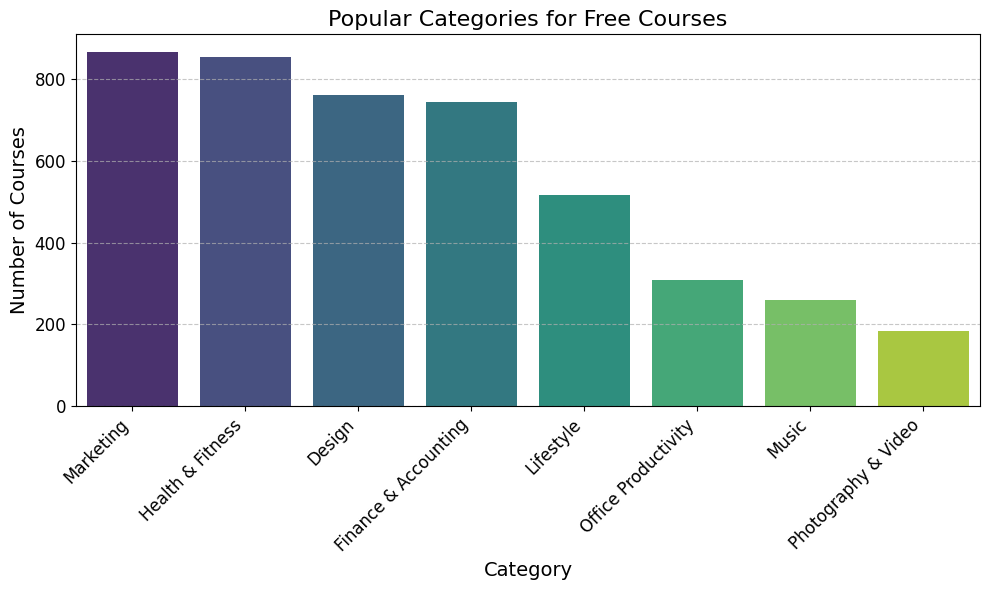

In [20]:
free_courses_df = df[df['is_paid'] == False]

# Counting the number of courses in each category for free courses
free_courses_category_counts = free_courses_df['category'].value_counts()

# Converting the result to a DataFrame for better visualization
free_courses_category_df = free_courses_category_counts.reset_index()
free_courses_category_df.columns = ['Category', 'Number of Courses']

# Displaying the result
free_courses_category_df

# Visualizing the distribution of categories for free courses
plt.figure(figsize=(10, 6))
sns.barplot(data=free_courses_category_df, x='Category', y='Number of Courses', palette='viridis')
plt.title('Popular Categories for Free Courses', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Courses', fontsize=14)

# Adjusting the x-axis labels to avoid overlap
plt.xticks(rotation=45, ha='right', fontsize=12)  # 'ha' stands for horizontal alignment
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ensures that everything fits without overlapping
plt.show()

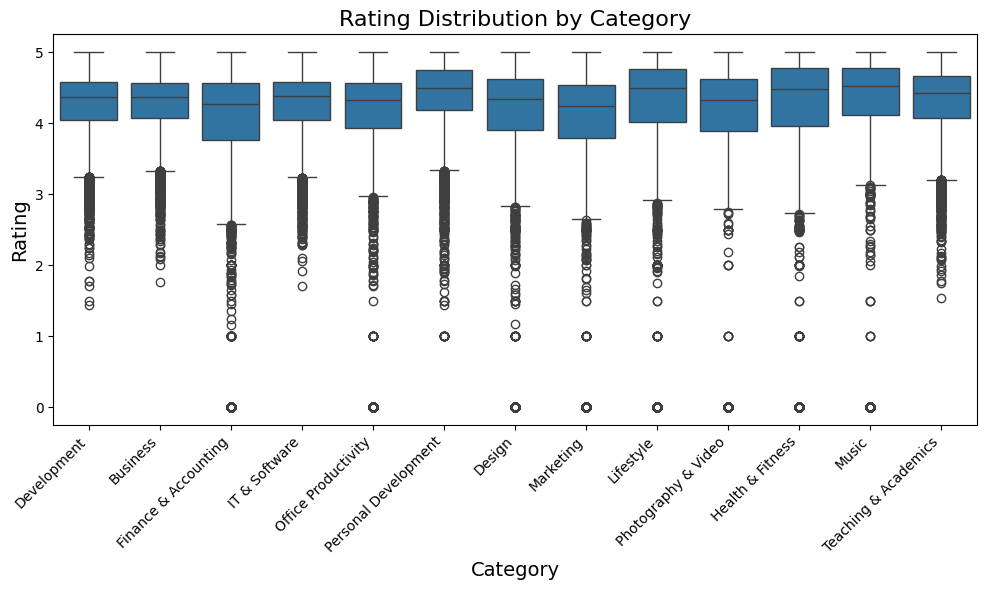

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='rating')
plt.title('Rating Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45, ha='right') 

plt.tight_layout()
plt.show()

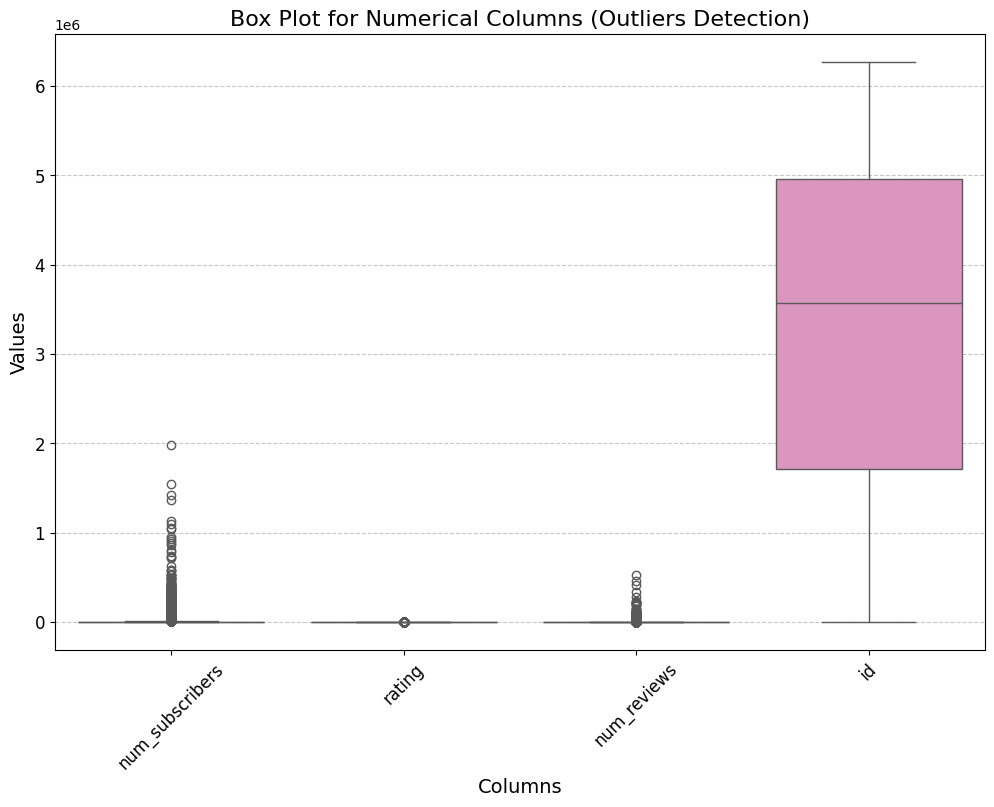

In [22]:
numerical_columns = ['num_subscribers', 'rating', 'num_reviews', 'id']  # Replace with actual numerical columns from your dataset

# Plotting box plots for each numerical column
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numerical_columns], palette='Set2')
plt.title('Box Plot for Numerical Columns (Outliers Detection)', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
outliers_count = {}

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR  # Lower boundary
    upper_bound = Q3 + 1.5 * IQR  # Upper boundary

    # Filter outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = outliers.shape[0]  # Count the number of outliers

# Print the total number of outliers for each column
for column, count in outliers_count.items():
    print(f"Column {column} has {count} outliers.")

Column num_subscribers has 13626 outliers.
Column rating has 7235 outliers.
Column num_reviews has 13810 outliers.
Column id has 0 outliers.


In [24]:
df = df[df['rating'] != 0]

df.head()

,id,title,url,is_paid,instructor_names,category,headline,num_subscribers,rating,num_reviews,instructional_level,objectives,curriculum
0,567828,The Complete Python Bootcamp From Zero to Hero...,https://www.udemy.com/course/complete-python-b...,True,"Jose Portilla, Pierian Training",Development,Learn Python like a Professional Start from t...,1976866,4.576494,521219,All Levels,You will learn how to leverage the power of Py...,"Course Overview, Auto-Welcome Message, Course ..."
1,1565838,The Complete 2024 Web Development Bootcamp,https://www.udemy.com/course/the-complete-web-...,True,"Dr. Angela Yu, Developer and Lead Instructor",Development,Become a Full-Stack Web Developer with just ON...,1362586,4.679065,409793,All Levels,Build 16 web development projects for your por...,"Front-End Web Development, What You'll Get in ..."
2,2776760,100 Days of Code: The Complete Python Pro Boot...,https://www.udemy.com/course/100-days-of-code/,True,"Dr. Angela Yu, Developer and Lead Instructor",Development,Master Python by building 100 projects in 100 ...,1417942,4.698768,331803,All Levels,You will master the Python programming languag...,Day 1 - Beginner - Working with Variables in P...
3,625204,The Web Developer Bootcamp 2024,https://www.udemy.com/course/the-web-developer...,True,Colt Steele,Development,10 Hours of React just added. Become a Develop...,923815,4.673450,276723,All Levels,"The ins and outs of HTML5, CSS3, and Modern Ja...","Course Orientation, Welcome To The Course!, Jo..."
4,1362070,React - The Complete Guide 2024 (incl. Next.js...,https://www.udemy.com/course/react-the-complet...,True,"Academind by Maximilian Schwarzmüller, Maximil...",Development,Dive in and learn React.js from scratch! Learn...,909848,4.638643,220051,All Levels,Learn React from the ground up and finish the ...,"Getting Started, Welcome To The Course!, What ..."


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92749 entries, 0 to 98103
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   92749 non-null  int64  
 1   title                92749 non-null  object 
 2   url                  92749 non-null  object 
 3   is_paid              92749 non-null  bool   
 4   instructor_names     92749 non-null  object 
 5   category             92749 non-null  object 
 6   headline             92749 non-null  object 
 7   num_subscribers      92749 non-null  int64  
 8   rating               92749 non-null  float64
 9   num_reviews          92749 non-null  int64  
 10  instructional_level  92749 non-null  object 
 11  objectives           92749 non-null  object 
 12  curriculum           92749 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 9.3+ MB


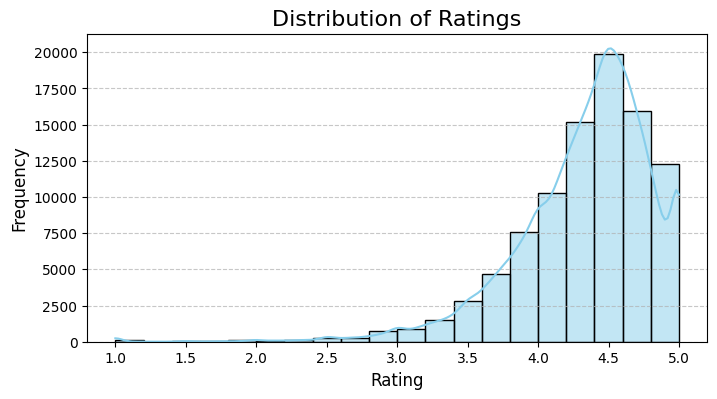

Average Rating: 4.33
Minimum Rating: 1.0
Maximum Rating: 5.0000005

Lowest Rated Courses:


,title,category,rating
19929,#1 Cryptocurrency Long-term Investment Opportu...,Finance & Accounting,1.0
24809,ULTIMATE INNER CIRCLE TRADER (ICT) FOREX COUR...,Finance & Accounting,1.0
24898,CGFM - Certified Government Financial Manager ...,Finance & Accounting,1.0
25324,Ichimoku Trading strategy – Advanced Strategy ...,Finance & Accounting,1.0
25325,GARP FRM Part II - Exams in 2024 - Full Practi...,Finance & Accounting,1.0
...,...,...,...
82358,Mushroom Cultivation for Beginners Certificate,Health & Fitness,1.0
82365,"Training for Track and Field - Sprints, Hurdle...",Health & Fitness,1.0
87595,christian gospel music,Music,1.0
87623,Audacity (Beginners & Advanced): Fast Track Tr...,Music,1.0



Highest Rated Courses:


,title,category,rating
25170,Trade the Stock Market using Relative Strength...,Finance & Accounting,5.0
25525,Binance Futures 2way Strategy - A Market Neutr...,Finance & Accounting,5.0
25598,CIMA (E1) Managing Finance in a Digital World ...,Finance & Accounting,5.0
49764,Rider-Waite Tarot in Relationships,Personal Development,5.0
50134,2. The Place Of Prayer,Personal Development,5.0
50263,How To Find Your Profitable Niche As A New Coa...,Personal Development,5.0
50436,The INTP Productivity Improvement Guide,Personal Development,5.0
50503,The Path to Happiness,Personal Development,5.0
50526,How to prepare yourself for job interview?,Personal Development,5.0
50627,The Neuroscience for the Adaptive Conscious Le...,Personal Development,5.0


Number of courses with the lowest rating: 146
Number of courses with the highest rating: 28


In [26]:
plt.figure(figsize=(8, 4))
sns.histplot(df['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate average, minimum, and maximum ratings
average_rating = df['rating'].mean()
min_rating = df['rating'].min()
max_rating = df['rating'].max()

print(f"Average Rating: {average_rating:.2f}")
print(f"Minimum Rating: {min_rating}")
print(f"Maximum Rating: {max_rating}")

# Filter courses with minimum and maximum ratings
lowest_rated_courses_df = df[df['rating'] == min_rating][['title', 'category', 'rating']]
highest_rated_courses_df = df[df['rating'] == max_rating][['title', 'category', 'rating']]

# Display the courses with the lowest and highest ratings
print("\nLowest Rated Courses:")
display(lowest_rated_courses_df)

print("\nHighest Rated Courses:")
display(highest_rated_courses_df)

# Count the number of records in each DataFrame
num_lowest_rated = len(lowest_rated_courses_df)
num_highest_rated = len(highest_rated_courses_df)

# Print the counts
print(f"Number of courses with the lowest rating: {num_lowest_rated}")
print(f"Number of courses with the highest rating: {num_highest_rated}")

In [27]:
outliers_count = {}

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range

    lower_bound = Q1 - 1.5 * IQR  # Lower boundary
    upper_bound = Q3 + 1.5 * IQR  # Upper boundary

    # Filter outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = outliers.shape[0]  # Count the number of outliers

# Print the total number of outliers for each column
for column, count in outliers_count.items():
    print(f"Column {column} has {count} outliers.")

Column num_subscribers has 12633 outliers.
Column rating has 2863 outliers.
Column num_reviews has 13130 outliers.
Column id has 0 outliers.


In [28]:
df['combined_text'] = df['headline'] + ' ' + df['objectives'] + ' ' + df['curriculum']

# Text cleaning function
def clean_text(text):
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    return text

df['cleaned_text'] = df['combined_text'].apply(clean_text)
df

C:\Users\dell\AppData\Local\Temp\ipykernel_4632\2714823949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['combined_text'] = df['headline'] + ' ' + df['objectives'] + ' ' + df['curriculum']
C:\Users\dell\AppData\Local\Temp\ipykernel_4632\2714823949.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['combined_text'].apply(clean_text)


,id,title,url,is_paid,instructor_names,category,headline,num_subscribers,rating,num_reviews,instructional_level,objectives,curriculum,combined_text,cleaned_text
0,567828,The Complete Python Bootcamp From Zero to Hero...,https://www.udemy.com/course/complete-python-b...,True,"Jose Portilla, Pierian Training",Development,Learn Python like a Professional Start from t...,1976866,4.576494,521219,All Levels,You will learn how to leverage the power of Py...,"Course Overview, Auto-Welcome Message, Course ...",Learn Python like a Professional Start from t...,learn python like a professional start from th...
1,1565838,The Complete 2024 Web Development Bootcamp,https://www.udemy.com/course/the-complete-web-...,True,"Dr. Angela Yu, Developer and Lead Instructor",Development,Become a Full-Stack Web Developer with just ON...,1362586,4.679065,409793,All Levels,Build 16 web development projects for your por...,"Front-End Web Development, What You'll Get in ...",Become a Full-Stack Web Developer with just ON...,become a full stack web developer with just on...
2,2776760,100 Days of Code: The Complete Python Pro Boot...,https://www.udemy.com/course/100-days-of-code/,True,"Dr. Angela Yu, Developer and Lead Instructor",Development,Master Python by building 100 projects in 100 ...,1417942,4.698768,331803,All Levels,You will master the Python programming languag...,Day 1 - Beginner - Working with Variables in P...,Master Python by building 100 projects in 100 ...,master python by building projects in days l...
3,625204,The Web Developer Bootcamp 2024,https://www.udemy.com/course/the-web-developer...,True,Colt Steele,Development,10 Hours of React just added. Become a Develop...,923815,4.673450,276723,All Levels,"The ins and outs of HTML5, CSS3, and Modern Ja...","Course Orientation, Welcome To The Course!, Jo...",10 Hours of React just added. Become a Develop...,hours of react just added become a developer ...
4,1362070,React - The Complete Guide 2024 (incl. Next.js...,https://www.udemy.com/course/react-the-complet...,True,"Academind by Maximilian Schwarzmüller, Maximil...",Development,Dive in and learn React.js from scratch! Learn...,909848,4.638643,220051,All Levels,Learn React from the ground up and finish the ...,"Getting Started, Welcome To The Course!, What ...",Dive in and learn React.js from scratch! Learn...,dive in and learn react js from scratch learn ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98099,115328,LinkedIn Career Success Starter for High Schoo...,https://www.udemy.com/course/linkedin-career-s...,True,Barbara Rozgonyi,Teaching & Academics,"Discover how personal branding, 3D networking,...",60,4.256361,4,Beginner Level,"By the end of the course, you will be building...","Introduction and Guide, Welcome! A Brief Cours...","Discover how personal branding, 3D networking,...",discover how personal branding d networking an...
98100,3789828,2 Minute French Whisperer Advanced - Course 4 ...,https://www.udemy.com/course/2-minute-french-w...,True,Christian Aubert,Teaching & Academics,280 French lessons to understand French in Fre...,117,5.000000,4,Intermediate Level,Learn to speak French at the speed French acto...,"280 French film dialog excerpts, Introduction,...",280 French lessons to understand French in Fre...,french lessons to understand french in french...
98101,6043978,Introduction to Biology of Aging,https://www.udemy.com/course/introduction-to-b...,True,Dr. Gabriele Morabito,Teaching & Academics,biological forces leading human aging and trea...,6,5.000000,4,All Levels,Definition of human aging and link to cellular...,"Introduction to the course, Welcome and Introd...",biological forces leading human aging and trea...,biological forces leading human aging and trea...
98102,5525778,Mastering Schematics Electrical Drawings Episo...,https://www.udemy.com/course/mastering-schemat...,True,Elite Engineering,Teaching & Academics,"Learn from Professionals, Electrical Power Eng...",49,4.088524,4,Intermediate Level,D

In [29]:
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
tfidf_matrix = tfidf.fit_transform(df['cleaned_text'])

# DataFrame of TF-IDF features
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

In [30]:
nbrs = NearestNeighbors(n_neighbors=6, metric='cosine').fit(tfidf_matrix)

# Get top 5 similar courses for the first course
course_index = 0
distances, indices = nbrs.kneighbors(tfidf_matrix[course_index])

# Get the selected course with additional columns
selected_course = df.iloc[course_index][['id', 'title', 'url', 'is_paid', 'instructor_names', 'category', 'instructional_level']]

# Get the similar courses (excluding self) with additional columns
similar_courses = df.iloc[indices[0][1:]][['id', 'title', 'url', 'is_paid', 'instructor_names', 'category', 'instructional_level']]

# Display the course being compared without including the first course (0 index)
print(f"Course being compared:\n")
print(f"ID: {selected_course['id']}")
print(f"Title: {selected_course['title']}")
print(f"URL: {selected_course['url']}")
print(f"Paid: {selected_course['is_paid']}")
print(f"Instructors: {selected_course['instructor_names']}")
print(f"Category: {selected_course['category']}")
print(f"Instructional Level: {selected_course['instructional_level']}")

# Display the similar courses without the first course (index 0)
print("\nTop 5 similar courses:")
similar_courses.reset_index(drop=True, inplace=True)  # Reset index for the similar courses dataframe
similar_courses

Course being compared:

ID: 567828
Title: The Complete Python Bootcamp From Zero to Hero in Python
URL: https://www.udemy.com/course/complete-python-bootcamp/
Paid: True
Instructors: Jose Portilla, Pierian Training
Category: Development
Instructional Level: All Levels

Top 5 similar courses:


,id,title,url,is_paid,instructor_names,category,instructional_level
0,1547268,The Complete Python Course | Learn Python by D...,https://www.udemy.com/course/the-complete-pyth...,True,Codestars • over 2 million students worldwide!...,Development,All Levels
1,5393658,Python: The Complete Guide for Software Testers,https://www.udemy.com/course/python-for-testers/,True,Dmitry Shyshkin,Development,Beginner Level
2,1343594,Complete Python 3 Programming Bootcamp: Beginn...,https://www.udemy.com/course/complete-python-p...,True,"Code Star Academy, Database Masters Training |...",Development,All Levels
3,3373188,Python Programming for Beginners - Practical &...,https://www.udemy.com/course/learn-complete-py...,True,Fatah Gabrial,Development,All Levels
4,453144,Python Tutorial for Absolute Beginners,https://www.udemy.com/course/python-crash-cour...,True,Yogesh Patel,Development,All Levels


In [31]:
selected_level = 'Beginner Level'  # The user can select 'All Levels', 'Beginner Level', 'Intermediate Level', or 'Expert Level'

# Filter courses by level
filtered_courses = df[df['instructional_level'] == selected_level]

# Ranking similar courses (e.g., based on cosine similarity results)
course_index = 0

# Get similar courses
distances, indices = nbrs.kneighbors(tfidf_matrix[course_index])

# Rank similar courses (those matching the selected level)
similar_courses = df.iloc[indices[0][1:]]  # Exclude self
filtered_similar_courses = similar_courses[similar_courses['instructional_level'] == selected_level]

# Convert results to a DataFrame with the required columns
filtered_similar_courses_df = filtered_similar_courses[
    ['id', 'title', 'url', 'is_paid', 'instructor_names', 'category', 'rating', 'num_subscribers', 'num_reviews', 'instructional_level']
].reset_index(drop=True)

# Display results
print(f"Top {selected_level} courses similar to {df.iloc[course_index]['title']}:")
filtered_similar_courses_df

Top Beginner Level courses similar to The Complete Python Bootcamp From Zero to Hero in Python:


,id,title,url,is_paid,instructor_names,category,rating,num_subscribers,num_reviews,instructional_level
0,5393658,Python: The Complete Guide for Software Testers,https://www.udemy.com/course/python-for-testers/,True,Dmitry Shyshkin,Development,4.499308,684,137,Beginner Level


In [32]:
selected_level = 'All Levels'  # The user can select 'All Levels', 'Beginner Level', 'Intermediate Level', or 'Expert Level'

# Filter courses by level
filtered_courses = df[df['instructional_level'] == selected_level]

# Ranking similar courses (e.g., based on cosine similarity results)
course_index = 0

# Get similar courses
distances, indices = nbrs.kneighbors(tfidf_matrix[course_index])

# Rank similar courses (those matching the selected level)
similar_courses = df.iloc[indices[0][1:]]  # Exclude self
filtered_similar_courses = similar_courses[similar_courses['instructional_level'] == selected_level]

# Convert results to a DataFrame with the required columns
filtered_similar_courses_df = filtered_similar_courses[
    ['id', 'title', 'url', 'is_paid', 'instructor_names', 'category', 'rating', 'num_subscribers', 'num_reviews', 'instructional_level']
].reset_index(drop=True)

# Display results
print(f"Top {selected_level} courses similar to {df.iloc[course_index]['title']}:")
filtered_similar_courses_df

Top All Levels courses similar to The Complete Python Bootcamp From Zero to Hero in Python:


,id,title,url,is_paid,instructor_names,category,rating,num_subscribers,num_reviews,instructional_level
0,1547268,The Complete Python Course | Learn Python by D...,https://www.udemy.com/course/the-complete-pyth...,True,Codestars • over 2 million students worldwide!...,Development,4.606865,92648,21735,All Levels
1,1343594,Complete Python 3 Programming Bootcamp: Beginn...,https://www.udemy.com/course/complete-python-p...,True,"Code Star Academy, Database Masters Training |...",Development,4.570816,6488,730,All Levels
2,3373188,Python Programming for Beginners - Practical &...,https://www.udemy.com/course/learn-complete-py...,True,Fatah Gabrial,Development,4.568828,40355,532,All Levels
3,453144,Python Tutorial for Absolute Beginners,https://www.udemy.com/course/python-crash-cour...,True,Yogesh Patel,Development,3.992834,3420,200,All Levels


In [33]:
selected_is_paid = True  # Example: True for paid courses, False for free courses
selected_category = 'Teaching & Academics'  # Example category
selected_level = 'Beginner Level'  # Example: 'All Levels', 'Beginner Level', etc.

# Apply filters
filtered_courses = df[
    (df['is_paid'] == selected_is_paid) &
    (df['category'] == selected_category) &
    (df['instructional_level'] == selected_level)
]

# Display the filtered courses
if not filtered_courses.empty:
    print(f"Courses matching the filters (Paid: {selected_is_paid}, Category: {selected_category}, Level: {selected_level}):")
    display(filtered_courses[['id', 'title', 'url', 'rating', 'num_subscribers', 'num_reviews', 'instructor_names', 'category', 'instructional_level', 'is_paid']])
else:
    print(f"No courses found matching the filters (Paid: {selected_is_paid}, Category: {selected_category}, Level: {selected_level}).")

Courses matching the filters (Paid: True, Category: Teaching & Academics, Level: Beginner Level):


,id,title,url,rating,num_subscribers,num_reviews,instructor_names,category,instructional_level,is_paid
88343,1325716,Spanish for Beginners. The Complete Spanish Co...,https://www.udemy.com/course/el-metodo-spanish-1/,4.708231,131098,32063,Peter Hanley,Teaching & Academics,Beginner Level,True
88348,949846,3 Minute French - Course 1 | Language lessons ...,https://www.udemy.com/course/3-minute-french-f...,4.694702,79920,18858,Kieran Ball,Teaching & Academics,Beginner Level,True
88349,1526882,Intensive English Mastery Course: Animated Beg...,https://www.udemy.com/course/complete-intensiv...,4.451806,84808,18741,Logus Academy,Teaching & Academics,Beginner Level,True
88352,1201172,Best Way to Learn German Language: Full Beginn...,https://www.udemy.com/course/best-way-to-learn...,4.718320,68405,14319,Sandra 11Percent,Teaching & Academics,Beginner Level,True
88362,832750,Level 1 Intelligence Analyst Certification,https://www.udemy.com/course/level-1-intellige...,4.463506,65368,10639,Robert Folker,Teaching & Academics,Beginner Level,True
...,...,...,...,...,...,...,...,...,...,...
98084,4919508,Learn Instrument & Control Engineering,https://www.udemy.com/course/learn-instrumenta...,4.506713,138,4,Aquilius Automation Services,Teaching & Academics,Beginner Level,True
98085,5189150,Learning Shona with Gogo Etina Washaya Nee Chi...,https://www.udemy.com/course/learning-shona-wi...,4.293366,19,4,Etina Washaya,Teaching & Academics,Beginner Level,True
98088,4742306,Electric Vehicle Charging Technology,https://www.udemy.com/course/electric-vehicle-...,3.599479,14,4,sidharth sabyasachi,Teaching & Academics,Beginner Level,True
98096,5861578,Advanced Solar Panel Technologies,https://www.udemy.com/course/advanced-solar-pa...,4.788707,17,4,OSS Academy,Teaching & Academics,Beginner Level,True


In [34]:
# User-selected filters
selected_is_paid = True  # Example: True for paid courses, False for free courses
selected_category = 'IT & Software'  # Example category
selected_level = 'Beginner Level'  # Example: 'All Levels', 'Beginner Level', etc.

# Apply filters
filtered_courses = df[
    (df['is_paid'] == selected_is_paid) &
    (df['category'] == selected_category) &
    (df['instructional_level'] == selected_level)
]

# Display the filtered courses
if not filtered_courses.empty:
    print(f"Courses matching the filters (Paid: {selected_is_paid}, Category: {selected_category}, Level: {selected_level}):")
    display(filtered_courses[['id', 'title', 'url', 'rating', 'num_subscribers', 'num_reviews', 'instructor_names', 'category', 'instructional_level', 'is_paid']])
else:
    print(f"No courses found matching the filters (Paid: {selected_is_paid}, Category: {selected_category}, Level: {selected_level}).")

Courses matching the filters (Paid: True, Category: IT & Software, Level: Beginner Level):


,id,title,url,rating,num_subscribers,num_reviews,instructor_names,category,instructional_level,is_paid
27182,3142166,[NEW] Ultimate AWS Certified Cloud Practitione...,https://www.udemy.com/course/aws-certified-clo...,4.731333,1049095,224865,Stephane Maarek | AWS Certified Cloud Practiti...,IT & Software,Beginner Level,True
27184,2394982,AZ-900: Microsoft Azure Fundamentals Exam Prep...,https://www.udemy.com/course/az900-azure/,4.568310,487406,115673,"Scott Duffy • 1.000.000+ Students, Software A...",IT & Software,Beginner Level,True
27186,1602900,Kubernetes for the Absolute Beginners - Hands-on,https://www.udemy.com/course/learn-kubernetes/,4.625870,380175,92024,"Mumshad Mannambeth, KodeKloud Training",IT & Software,Beginner Level,True
27188,2636008,Introduction to Service Management with ITIL 4,https://www.udemy.com/course/service-managemen...,4.516859,207693,80598,Jason Dion • 1.8 Million+ Enrollments Worldwid...,IT & Software,Beginner Level,True
27191,1203374,Cisco CCNA 200-301 – The Complete Guide to Get...,https://www.udemy.com/course/ccna-complete/,4.779667,250401,70986,Neil Anderson,IT & Software,Beginner Level,True
...,...,...,...,...,...,...,...,...,...,...
37055,2484488,Artificial Intelligence for Complete Beginners,https://www.udemy.com/course/artificial-intell...,4.243796,879,31,Management Study Guide,IT & Software,Beginner Level,True
37056,5255166,Oracle APEX Fast Lane: From Novice to Pro in W...,https://www.udemy.com/course/oracle-apex-pro/,4.365528,171,31,Riaz Ahmed,IT & Software,Beginner Level,True
37059,2816891,Microsoft Dynamics 365 CRM: MasterClass for Be...,https://www.udemy.com/course/dynamics-365-crm-...,3.874896,166,31,Vijayraj Hole,IT & Software,Beginner Level,True
37065,688944,Internet Safety - How to keep your children sa...,https://www.udemy.com/course/how-to-keep-your-...,4.636935,252,31,Phil Walters,IT & Software,Beginner Level,True


In [35]:
# Count the number of courses in the 'IT & Software' category
it_software_count = df[df['category'] == 'IT & Software'].shape[0]

print(f"Total number of courses in 'IT & Software' category: {it_software_count}")

Total number of courses in 'IT & Software' category: 9888


In [36]:
df['category'].unique()

array(['Development', 'Business', 'Finance & Accounting', 'IT & Software',
       'Office Productivity', 'Personal Development', 'Design',
       'Marketing', 'Lifestyle', 'Photography & Video',
       'Health & Fitness', 'Music', 'Teaching & Academics'], dtype=object)

In [37]:
# User-selected filters
selected_is_paid = True  # Example: True for paid courses, False for free courses
selected_category = 'Teaching & Academics'  # Example category
selected_level = 'All Levels'  # Example: 'All Levels', 'Beginner Level', etc.

# Apply filters
filtered_courses = df[
    (df['is_paid'] == selected_is_paid) &
    (df['category'] == selected_category) &
    (df['instructional_level'] == selected_level)
]

# Display the filtered courses
if not filtered_courses.empty:
    print(f"Courses matching the filters (Paid: {selected_is_paid}, Category: {selected_category}, Level: {selected_level}):")
    display(filtered_courses[['id', 'title', 'url', 'rating', 'num_subscribers', 'num_reviews', 'instructor_names', 'category', 'instructional_level', 'is_paid']])
else:
    print(f"No courses found matching the filters (Paid: {selected_is_paid}, Category: {selected_category}, Level: {selected_level}).")

Courses matching the filters (Paid: True, Category: Teaching & Academics, Level: All Levels):


,id,title,url,rating,num_subscribers,num_reviews,instructor_names,category,instructional_level,is_paid
88341,684272,IELTS Band 7+ Complete Prep Course,https://www.udemy.com/course/ielts-band-7-prep...,4.598378,231885,44670,"Keino Campbell, Esq.",Teaching & Academics,All Levels,True
88344,815474,Master Cognitive Biases and Improve Your Criti...,https://www.udemy.com/course/upgrade-your-mind...,4.518662,71486,29088,Kevin deLaplante,Teaching & Academics,All Levels,True
88345,834702,Building Your English Brain,https://www.udemy.com/course/building-your-eng...,4.590615,103064,27874,Luke Priddy,Teaching & Academics,All Levels,True
88346,2327564,"The English Master Course: English Grammar, En...",https://www.udemy.com/course/learn-english-gra...,4.557813,152113,25162,Scott Mendoza,Teaching & Academics,All Levels,True
88347,2167814,Java Spring Framework 6 with Spring Boot 3,https://www.udemy.com/course/spring-5-with-spr...,4.580372,170004,22344,Navin Reddy,Teaching & Academics,All Levels,True
...,...,...,...,...,...,...,...,...,...,...
98094,3848124,Classroom Management Success,https://www.udemy.com/course/classroom-managem...,4.726879,79,4,Dr. Dheeraj Mehrotra,Teaching & Academics,All Levels,True
98095,5166642,Mastering the Ablative Case in Latin: 20 Uses ...,https://www.udemy.com/course/mastering-the-abl...,4.000149,7,4,James Milliken,Teaching & Academics,All Levels,True
98097,4687734,ANSYS Workbench Tutorials Part-II,https://www.udemy.com/course/ansys-workbench-t...,3.796038,35,4,Samanwita Bagg,Teaching & Academics,All Levels,True
98098,5919126,ARM Processor - Core Components of ARM Processors,https://www.udemy.com/course/arm-processor-fro...,4.564740,42,4,Hitesh Dholakiya,Teaching & Academics,All Levels,True


In [38]:
# Count the number of courses in the 'IT & Software' category
it_software_count = df[df['category'] == 'Teaching & Academics'].shape[0]

print(f"Total number of courses in 'IT & Software' category: {it_software_count}")

Total number of courses in 'IT & Software' category: 9763


In [39]:
# Filter courses by 'Intermediate Level'
intermediate_courses = df[df['instructional_level'] == 'Intermediate Level']

# Display course titles as a DataFrame
print("Courses at 'Intermediate Level':")
display(intermediate_courses[['id', 'title', 'category', 'is_paid']])

Courses at 'Intermediate Level':


,id,title,category,is_paid
48,1026604,"Advanced CSS and Sass: Flexbox, Grid, Animatio...",Development,True
58,383576,"C# Intermediate: Classes, Interfaces and OOP",Development,True
97,980798,Spark and Python for Big Data with PySpark,Development,True
104,970600,REST APIs with Flask and Python in 2024,Development,True
107,356030,C# Advanced Topics: Prepare for Technical Inte...,Development,True
...,...,...,...,...
98087,3219975,Aviation: Get ready for your FAA Private Pilot...,Teaching & Academics,True
98091,4150158,Mechanics of Materials,Teaching & Academics,True
98100,3789828,2 Minute French Whisperer Advanced - Course 4 ...,Teaching & Academics,True
98102,5525778,Mastering Schematics Electrical Drawings Episo...,Teaching & Academics,True


In [40]:
# User-selected filters
selected_is_paid = True  # Example: True for paid courses, False for free courses
selected_category = 'Development'  # Example category
selected_level = 'Intermediate Level'  # Example: 'All Levels', 'Beginner Level', etc.

# Apply filters
filtered_courses = df[
    (df['is_paid'] == selected_is_paid) &
    (df['category'] == selected_category) &
    (df['instructional_level'] == selected_level)
]

# Display the filtered courses
if not filtered_courses.empty:
    print(f"Courses matching the filters (Paid: {selected_is_paid}, Category: {selected_category}, Level: {selected_level}):")
    display(filtered_courses[['id', 'title', 'url', 'rating', 'num_subscribers', 'num_reviews', 'instructor_names', 'category', 'instructional_level', 'is_paid']])
else:
    print(f"No courses found matching the filters (Paid: {selected_is_paid}, Category: {selected_category}, Level: {selected_level}).")

Courses matching the filters (Paid: True, Category: Development, Level: Intermediate Level):


,id,title,url,rating,num_subscribers,num_reviews,instructor_names,category,instructional_level,is_paid
48,1026604,"Advanced CSS and Sass: Flexbox, Grid, Animatio...",https://www.udemy.com/course/advanced-css-and-...,4.731044,214454,44667,Jonas Schmedtmann,Development,Intermediate Level,True
58,383576,"C# Intermediate: Classes, Interfaces and OOP",https://www.udemy.com/course/csharp-intermedia...,4.512966,164183,38018,Mosh Hamedani,Development,Intermediate Level,True
97,980798,Spark and Python for Big Data with PySpark,https://www.udemy.com/course/spark-and-python-...,4.515277,138628,24739,"Jose Portilla, Pierian Training",Development,Intermediate Level,True
104,970600,REST APIs with Flask and Python in 2024,https://www.udemy.com/course/rest-api-flask-an...,4.586237,133645,23355,"Jose Salvatierra, Teclado by Jose Salvatierra",Development,Intermediate Level,True
107,356030,C# Advanced Topics: Prepare for Technical Inte...,https://www.udemy.com/course/csharp-advanced/,4.422021,128969,23282,Mosh Hamedani,Development,Intermediate Level,True
...,...,...,...,...,...,...,...,...,...,...
9917,5261974,Programming Language with LLVM,https://www.udemy.com/course/programming-langu...,4.682612,297,42,Dmitry Soshnikov,Development,Intermediate Level,True
9927,5369150,Flutter and Riverpod for Beginners | Task Mana...,https://www.udemy.com/course/flutter-riverpod-...,3.387471,1127,41,Dastagir Ahmed,Development,Intermediate Level,True
9940,5054174,"Python lists, tuples, sets and dictionaries - ...",https://www.udemy.com/course/python-intermedia...,4.988370,180,41,Loek van den Ouweland,Development,Intermediate Level,True
9941,4394396,Industry Level Code Quality Uplift,https://www.udemy.com/course/industry-level-co...,4.298666,103,41,Jack Hao,Development,Intermediate Level,True


In [41]:
# Filter courses by 'Intermediate Level'
intermediate_courses = df[df['instructional_level'] == 'Expert Level']

# Display course titles as a DataFrame
print("Courses at 'Expert Level':")
display(intermediate_courses[['id', 'title', 'category', 'is_paid']])

Courses at 'Expert Level':


,id,title,category,is_paid
294,918390,Natural Language Processing with Deep Learning...,Development,True
404,753174,Advanced SQL : The Ultimate Guide (2024),Development,True
409,1153742,Advanced AI: Deep Reinforcement Learning in Py...,Development,True
544,65830,The Java Spring Tutorial: Learn Java's Popular...,Development,True
684,1775858,Advanced Scala and Functional Programming,Development,True
...,...,...,...,...
97816,5978174,School Management Strategies,Teaching & Academics,True
97825,5961334,Perceived Quality in the Automotive Industry,Teaching & Academics,True
97952,1265576,Japanese Language Teacher Training Program < L...,Teaching & Academics,True
97986,3636252,Advanced Rigid Body Mechanics in Three Dimensions,Teaching & Academics,True


In [42]:
# User-selected filters
selected_is_paid = True  # Example: True for paid courses, False for free courses
selected_category = 'Development'  # Example category
selected_level = 'Expert Level'  # Example: 'All Levels', 'Beginner Level', etc.

# Apply filters
filtered_courses = df[
    (df['is_paid'] == selected_is_paid) &
    (df['category'] == selected_category) &
    (df['instructional_level'] == selected_level)
]

# Display the filtered courses
if not filtered_courses.empty:
    print(f"Courses matching the filters (Paid: {selected_is_paid}, Category: {selected_category}, Level: {selected_level}):")
    display(filtered_courses[['id', 'title', 'url', 'rating', 'num_subscribers', 'num_reviews', 'instructor_names', 'category', 'instructional_level', 'is_paid']])
else:
    print(f"No courses found matching the filters (Paid: {selected_is_paid}, Category: {selected_category}, Level: {selected_level}).")

Courses matching the filters (Paid: True, Category: Development, Level: Expert Level):


,id,title,url,rating,num_subscribers,num_reviews,instructor_names,category,instructional_level,is_paid
294,918390,Natural Language Processing with Deep Learning...,https://www.udemy.com/course/natural-language-...,4.617122,49099,8476,Lazy Programmer Inc.,Development,Expert Level,True
404,753174,Advanced SQL : The Ultimate Guide (2024),https://www.udemy.com/course/sql-advanced/,4.224548,43555,6025,"Database Masters Training | 250,000+ Students ...",Development,Expert Level,True
409,1153742,Advanced AI: Deep Reinforcement Learning in Py...,https://www.udemy.com/course/deep-reinforcemen...,4.613897,41520,5896,"Lazy Programmer Team, Lazy Programmer Inc.",Development,Expert Level,True
544,65830,The Java Spring Tutorial: Learn Java's Popular...,https://www.udemy.com/course/javaspring/,4.296483,32502,4433,John Purcell,Development,Expert Level,True
684,1775858,Advanced Scala and Functional Programming,https://www.udemy.com/course/advanced-scala/,4.774769,27909,3434,Daniel Ciocîrlan,Development,Expert Level,True
...,...,...,...,...,...,...,...,...,...,...
9490,3734050,ISTQB Agile Technical Tester - Advanced Level,https://www.udemy.com/course/agile-technical-t...,4.456446,378,47,"Tarek Roshdy, Nezam Team",Development,Expert Level,True
9598,1192866,Learning AWS Lambda,https://www.udemy.com/course/learning-aws-lambda/,3.654236,336,45,Packt Publishing,Development,Expert Level,True
9657,3302492,Deep Dive into Algorithms,https://www.udemy.com/course/deep-dive-into-al...,4.200945,696,45,SACHIN NANDHA SABARISH J,Development,Expert Level,True
9851,4306791,Unity UI Toolkit,https://www.udemy.com/course/unity-ui-toolkit/,3.518696,288,42,"Cory Maklin, Omar Azam, Azaun Solutions",Development,Expert Level,True


In [45]:
!pip install --upgrade numpy h5py

   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
   -------------- ------------------------- 1.0/3.0 MB 2.8 MB/s eta 0:00:01
   --------------------- ------------------ 1.6/3.0 MB 3.0 MB/s eta 0:00:01
   ------------------------------- -------- 2.4/3.0 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 3.0/3.0 MB 3.2 MB/s eta 0:00:00
  Attempting uninstall: h5py
    Found existing installation: h5py 3.11.0
    Uninstalling h5py-3.11.0:
      Successfully uninstalled h5py-3.11.0


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-nightly-intel 2.19.0.dev20250107 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.2 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.2 which is incompatible.


In [48]:
!transformers-cli download bert-base-uncased

2025-01-21 08:56:06.508100: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-21 08:56:07.943295: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need 

In [52]:
!pip install --upgrade transformers tensorflow

  Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl.metadata (59 kB)
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.7 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.0/9.7 MB 3.1 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.7 MB 3.5 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.7 MB 3.6 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.7 MB 3.9 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.7 MB 4.1 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.7 MB 4.3 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.7 MB 4.6 MB/s eta 0:00:01
   ----------------------------------- ---- 8.7/9.7 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 4.9 MB/s eta 0:00:00
Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl (15.6 MB)
  Attempting uninstall: numpy
    Found 

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.0.2 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.1 which is incompatible.


In [54]:
!pip install --upgrade transformers

In [61]:
from transformers import BertTokenizer, BertModel
import torch

# Define the model name
model_name = 'bert-base-uncased'

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

RuntimeError: Failed to import transformers.models.bert.modeling_bert because of the following error (look up to see its traceback):
numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [57]:
!pip install torch

In [75]:
!pip install numpy torch transformers

In [76]:
import torch

In [78]:
!pip install numpy==1.21.6
!pip install torch==1.12.1
!pip install transformers==4.25.0

ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.6 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/5.8 MB ? eta -:--:--
   --- ------------------------------------ 0.5/5.8 MB 3.4 MB/s eta 0:00:02
   -------- ------------------------------- 1.3/5.8 MB 3.4 MB/s eta 0:00:02
   -------------- ------------------------- 2.1/5.8 MB 3.4 MB/s eta 0:00:02
   --------------------- ------------------ 3.1/5.8 MB 3.8 MB/s eta 0:00:01
   ---------------------------- ----------- 4.2/5.8 MB 4.1 MB/s eta 0:00:01
   ----------------------------------- ---- 5.2/5.8 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 5.8/5.8 MB 4.4 MB/s eta 0:00:00
Failed to build tokenizers


Reason for being yanked: Version was not properly set
  error: subprocess-exited-with-error
  
  exit code: 1
  
  [49 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\tokenizers
  copying py_src\tokenizers\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers
  creating build\lib.win-amd64-cpython-312\tokenizers\models
  copying py_src\tokenizers\models\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\models
  creating build\lib.win-amd64-cpython-312\tokenizers\decoders
  copying py_src\tokenizers\decoders\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\decoders
  creating build\lib.win-amd64-cpython-312\tokenizers\normalizers
  copying py_src\tokenizers\normalizers\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers\normalizers
  creating build\lib.win-amd64-cpython-312\tokenizers\pre_tokenizers
  copying py_src\tokenizers\pre_tokenizers\__init__.py -> build\lib.win-amd64-cpython-312\toke

In [83]:
import wordcloud

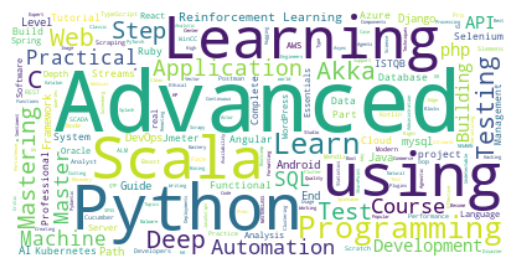

In [85]:
# create a word cloud
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white").generate(' '.join(filtered_courses['title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [86]:
unique_course_names = df['title'].unique()
print(unique_course_names)

['The Complete Python Bootcamp From Zero to Hero in Python'
 'The Complete 2024 Web Development Bootcamp'
 '100 Days of Code: The Complete Python Pro Bootcamp' ...
 'Introduction to Biology of Aging'
 'Mastering Schematics Electrical Drawings Episode 3'
 'Understanding RC  Resonant Circuits and Passive Filters']


In [87]:
unique_course_names = df['category'].unique()
print(unique_course_names)

['Development' 'Business' 'Finance & Accounting' 'IT & Software'
 'Office Productivity' 'Personal Development' 'Design' 'Marketing'
 'Lifestyle' 'Photography & Video' 'Health & Fitness' 'Music'
 'Teaching & Academics']


In [88]:
unique_course_names = df['instructional_level'].unique()
print(unique_course_names)

['All Levels' 'Beginner Level' 'Intermediate Level' 'Expert Level']


In [89]:
# User input for course title
input_course_title = "Learning LosslessCut from Scratch"  # Example course title

# Filter the course from the DataFrame
course_data = df[df['title'] == input_course_title].iloc[0]

# Calculate similarities with all other courses
cos_similarities = cosine_similarity([course_data['bert_embeddings']], df['bert_embeddings'].to_list())[0]

# Sort by similarity and recommend top 5 most similar courses
df['similarity'] = cos_similarities
similar_courses = df.sort_values(by='similarity', ascending=False).head(10)

# Filter results by category and instructional level, e.g., only 'Health & Fitness' and 'Intermediate' level courses
filtered_courses = similar_courses[
    (similar_courses['category'] == 'Photography & Video') & 
    (similar_courses['instructional_level'] == 'Beginner Level')
]

# Display results
filtered_courses[['id', 'title', 'instructor_names', 'is_paid', 'category', 'instructional_level', 'curriculum', 'objectives']]

KeyError: 'bert_embeddings'

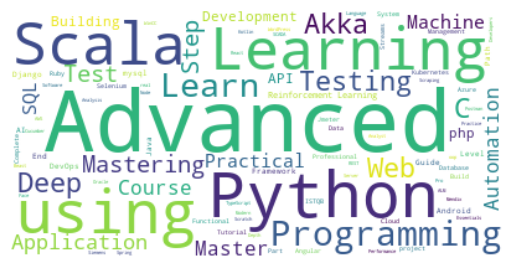

In [90]:
wordcloud = WordCloud(background_color="white").generate(' '.join(filtered_courses['title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [91]:
photography_courses = df[df['category'] == 'Photography & Video']

photography_courses

,id,title,url,is_paid,instructor_names,category,headline,num_subscribers,rating,num_reviews,instructional_level,objectives,curriculum,combined_text,cleaned_text
73682,1462428,Photography Masterclass: Your Complete Guide t...,https://www.udemy.com/course/photography-maste...,True,"Phil Ebiner, William Carnahan, Video School, S...",Photography & Video,The Best Online Professional Photography Class...,378498,4.749377,73016,All Levels,You will know how to take amazing photos that ...,Photography Masterclass Introduction & Course ...,The Best Online Professional Photography Class...,the best online professional photography class...
73683,926512,Adobe Premiere Pro Masterclass: Video Editing ...,https://www.udemy.com/course/adobe-premiere-pr...,True,"Phil Ebiner, Video School",Photography & Video,Learn Beginner-Advanced Adobe Premiere Pro Vid...,492033,4.611174,41839,All Levels,Master Premiere Pro and be CONFIDENT Editing Y...,"Introduction to the Adobe Premiere Pro Course,...",Learn Beginner-Advanced Adobe Premiere Pro Vid...,learn beginner advanced adobe premiere pro vid...
73684,1392122,iPhone Photography | Take Professional Photos ...,https://www.udemy.com/course/iphonephotography/,True,Dale McManus,Photography & Video,Your Online Guide to Taking Stunning iPhone Ph...,103538,4.499689,30619,Beginner Level,How to replicate professional digital photogra...,"iPhone Photography Introduction, Who Are You a...",Your Online Guide to Taking Stunning iPhone Ph...,your online guide to taking stunning iphone ph...
73685,1027180,"Video Production Bootcamp: Videography, Cinema...",https://www.udemy.com/course/video-production-...,True,"Phil Ebiner, William Carnahan, Sam Shimizu-Jon...",Photography & Video,Make better videos with the ultimate course on...,181904,4.542722,10758,Beginner Level,You'll create professional videos with the equ...,"Introduction to the Video Production Bootcamp,...",Make better videos with the ultimate course on...,make better videos with the ultimate course on...
73686,1390206,DaVinci Resolve Mastery: The Ultimate Video Ed...,https://www.udemy.com/course/davinci-resolve-t...,True,"Louay Zambarakji, Kaiversity Online",Photography & Video,"DaVinci Resolve: Learn Video Editing, Color Co...",58869,4.580091,10752,All Levels,Mastering DaVinci Resolve for Video Editing: A...,"Welcome to Video editing in Davinci Resolve, W...","DaVinci Resolve: Learn Video Editing, Color Co...",davinci resolve learn video editing color corr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75916,5750088,Adobe Premier Pro Basic to Advance Course for ...,https://www.udemy.com/course/adobe-premier-pro...,False,Habib Ullah,Photography & Video,Learn Video Editing on Premier Pro from Scratch,268,3.647059,2,Intermediate Level,Learn Adobe Premier Pro software from scratch ...,"Introduction, Introduction, Installation and O...",Learn Video Editing on Premier Pro from Scratc...,learn video editing on premier pro from scratc...
75917,4291352,Learning LosslessCut from Scratch,https://www.udemy.com/course/learning-lossless...,False,Pratik Pradhan,Photography & Video,Cut and Merge Videos without Loosing Quality,576,5.000000,1,Beginner Level,LosslessCut Video Cutting Video Merging,"Getting Started, Downloading and Creating Desk...",Cut and Merge Videos without Loosing Quality L...,cut and merge videos without loosing quality l...
75918,6032608,Photo Booth Rentals,https://www.udemy.com/course/photo-booth-rentals/,False,Kris Hartmann,Photography & Video,AWARD-WINNING PHOTO BOOTHS,307,5.000000,1,Beginner Level,New Photo Booth Rental Operators SEO overview ...,"Introduction, HOW TO START A PHOTO BOOTH BUSIN...",AWARD-WINNING PHOTO BOOTHS New Photo Booth Ren...,award winning photo booths new photo booth ren...
75919,3570051,Family Fun Videos,https://www.udemy.com/course/family-fun-videos/,False,Mike Merkur,Photography & Video,Come Behind the Scenes and See the Making of M...,854,5.000000,1,Intermediate Level,Create Unique Transitions All My Best

In [92]:
df

,id,title,url,is_paid,instructor_names,category,headline,num_subscribers,rating,num_reviews,instructional_level,objectives,curriculum,combined_text,cleaned_text
0,567828,The Complete Python Bootcamp From Zero to Hero...,https://www.udemy.com/course/complete-python-b...,True,"Jose Portilla, Pierian Training",Development,Learn Python like a Professional Start from t...,1976866,4.576494,521219,All Levels,You will learn how to leverage the power of Py...,"Course Overview, Auto-Welcome Message, Course ...",Learn Python like a Professional Start from t...,learn python like a professional start from th...
1,1565838,The Complete 2024 Web Development Bootcamp,https://www.udemy.com/course/the-complete-web-...,True,"Dr. Angela Yu, Developer and Lead Instructor",Development,Become a Full-Stack Web Developer with just ON...,1362586,4.679065,409793,All Levels,Build 16 web development projects for your por...,"Front-End Web Development, What You'll Get in ...",Become a Full-Stack Web Developer with just ON...,become a full stack web developer with just on...
2,2776760,100 Days of Code: The Complete Python Pro Boot...,https://www.udemy.com/course/100-days-of-code/,True,"Dr. Angela Yu, Developer and Lead Instructor",Development,Master Python by building 100 projects in 100 ...,1417942,4.698768,331803,All Levels,You will master the Python programming languag...,Day 1 - Beginner - Working with Variables in P...,Master Python by building 100 projects in 100 ...,master python by building projects in days l...
3,625204,The Web Developer Bootcamp 2024,https://www.udemy.com/course/the-web-developer...,True,Colt Steele,Development,10 Hours of React just added. Become a Develop...,923815,4.673450,276723,All Levels,"The ins and outs of HTML5, CSS3, and Modern Ja...","Course Orientation, Welcome To The Course!, Jo...",10 Hours of React just added. Become a Develop...,hours of react just added become a developer ...
4,1362070,React - The Complete Guide 2024 (incl. Next.js...,https://www.udemy.com/course/react-the-complet...,True,"Academind by Maximilian Schwarzmüller, Maximil...",Development,Dive in and learn React.js from scratch! Learn...,909848,4.638643,220051,All Levels,Learn React from the ground up and finish the ...,"Getting Started, Welcome To The Course!, What ...",Dive in and learn React.js from scratch! Learn...,dive in and learn react js from scratch learn ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98099,115328,LinkedIn Career Success Starter for High Schoo...,https://www.udemy.com/course/linkedin-career-s...,True,Barbara Rozgonyi,Teaching & Academics,"Discover how personal branding, 3D networking,...",60,4.256361,4,Beginner Level,"By the end of the course, you will be building...","Introduction and Guide, Welcome! A Brief Cours...","Discover how personal branding, 3D networking,...",discover how personal branding d networking an...
98100,3789828,2 Minute French Whisperer Advanced - Course 4 ...,https://www.udemy.com/course/2-minute-french-w...,True,Christian Aubert,Teaching & Academics,280 French lessons to understand French in Fre...,117,5.000000,4,Intermediate Level,Learn to speak French at the speed French acto...,"280 French film dialog excerpts, Introduction,...",280 French lessons to understand French in Fre...,french lessons to understand french in french...
98101,6043978,Introduction to Biology of Aging,https://www.udemy.com/course/introduction-to-b...,True,Dr. Gabriele Morabito,Teaching & Academics,biological forces leading human aging and trea...,6,5.000000,4,All Levels,Definition of human aging and link to cellular...,"Introduction to the course, Welcome and Introd...",biological forces leading human aging and trea...,biological forces leading human aging and trea...
98102,5525778,Mastering Schematics Electrical Drawings Episo...,https://www.udemy.com/course/mastering-schemat...,True,Elite Engineering,Teaching & Academics,"Learn from Professionals, Electrical Power Eng...",49,4.088524,4,Intermediate Level,D

In [93]:
hf_courses = df[df['category'] == 'Health & Fitness']

hf_courses

,id,title,url,is_paid,instructor_names,category,headline,num_subscribers,rating,num_reviews,instructional_level,objectives,curriculum,combined_text,cleaned_text
75928,1091520,Cognitive Behavioural Therapy (CBT) Practition...,https://www.udemy.com/course/cognitive-behavio...,True,"Kain Ramsay, The Academy of Modern Applied Psy...",Health & Fitness,Become a Certified Cognitive Behavioural Thera...,164506,4.662788,35525,All Levels,"Cognitive psychology: An analysis, evaluation,...",The Central Ideas of Cognitive Behaviour Thera...,Become a Certified Cognitive Behavioural Thera...,become a certified cognitive behavioural thera...
75929,1746608,Therapeutic Art Life Coach Certification (Acc...,https://www.udemy.com/course/art-therapy-life-...,True,"Joeel & Natalie Rivera, Victoria Hawkins, Tran...",Health & Fitness,"Therapeutic Art: Help Clients Heal, Reduce Str...",53627,4.361410,14606,All Levels,Understand the psychology behind how to use th...,Introduction to Using Therapeutic Art as a Lif...,"Therapeutic Art: Help Clients Heal, Reduce Str...",therapeutic art help clients heal reduce stres...
75930,985790,Herbalism :: Introduction & Medicine Making Ce...,https://www.udemy.com/course/herbalism-medicin...,True,Elizabeth Heck,Health & Fitness,Take charge of your health with herbal medicin...,68696,4.722426,14191,All Levels,Start making your first herbal remedy from day...,"Introduction, What is Herbalism and How Does i...",Take charge of your health with herbal medicin...,take charge of your health with herbal medicin...
75931,395170,15 Minutes x 15 Days Yoga Mobility Challenge,https://www.udemy.com/course/yoga-mobility-cha...,True,Abi Carver,Health & Fitness,"Increase your flexibility and range of motion,...",33207,4.558936,13404,Intermediate Level,"15 vinyasa or ""flow"" yoga sequences. Improve y...","Foundations, Flow, Breath, Control, Strength, ...","Increase your flexibility and range of motion,...",increase your flexibility and range of motion ...
75932,1504862,Internationally Accredited Certificate in Nutr...,https://www.udemy.com/course/internationally-a...,True,"Akash Sehrawat, Fabulous Body, Teaching Assistant",Health & Fitness,Become a Nutrition Coach: Learn the Fundamenta...,61092,4.532558,11811,All Levels,Understand what the Macronutrients are and the...,"Starters Pack, Introduction, Who is this cours...",Become a Nutrition Coach: Learn the Fundamenta...,become a nutrition coach learn the fundamental...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84431,5672646,دور الصيدلي في علاج أمراض الجهاز الهضمي,https://www.udemy.com/course/learn-otc-of-git/,False,Ahmed Abd El-Moniem Amer,Health & Fitness,تعلم كيفية استخدام الأدوية اللاوصفية في العلاج...,152,5.000000,1,Beginner Level,How to handle various cases in the pharmacy OT...,"Introduction, Introduction, Oral Thrush (Candi...",تعلم كيفية استخدام الأدوية اللاوصفية في العلاج...,تعلم كيفية استخدام الأدوية اللاوصفية في العلاج...
84432,6243241,Health Is Wealth Youniversity,https://www.udemy.com/course/health-is-wealth-...,False,"Harvey Loomstein, Ph.D.",Health & Fitness,VETERANSWERS Supporter,106,5.000000,1,All Levels,Inflammation Detoxification Pathways,"Health Is Wealth Youniversity, Inflammation, D...",VETERANSWERS Supporter Inflammation Detoxifica...,veteranswers supporter inflammation detoxifica...
84433,5437796,Daily Yoga Essentials,https://www.udemy.com/course/daily-yoga-essent...,False,Rachel Talan,Health & Fitness,Everything you need to start a gentle daily yo...,610,3.500000,1,All Levels,Practice gentle yoga classes that make you fee...,"Yoga Essentials, Introduction, Morning Yoga Pr...",Everything you need to start a gentle daily yo...,everything you need to start a gentle daily yo...
84434,6019978,"Recipes, Herbs, and Energy Exercise for HIV/AI...",https://www.udemy.com/course/recipes-herbs-and...,False,Barefoot Taoists,Health & Fitness,"Immune Support, Enhance Energy Level, Rebuild ...",97,5.000000,1,All Levels,Understand Nutritional Needs: Learn h

In [94]:
input_course_title = "Daily Yoga Essentials"  # Example course title

# Filter the course from the DataFrame
course_data = df[df['title'] == input_course_title].iloc[0]

# Calculate similarities with all other courses
cos_similarities = cosine_similarity([course_data['bert_embeddings']], df['bert_embeddings'].to_list())[0]

# Sort by similarity and recommend top 5 most similar courses
df['similarity'] = cos_similarities
similar_courses = df.sort_values(by='similarity', ascending=False).head(10)

# Filter results by category and instructional level, e.g., only 'Health & Fitness' and 'Intermediate' level courses
filtered_courses = similar_courses[
    (similar_courses['category'] == 'Health & Fitness') & 
    (similar_courses['instructional_level'] == 'All Levels')
]

# Display results
filtered_courses[['id', 'title', 'instructor_names', 'is_paid', 'category', 'instructional_level', 'curriculum', 'objectives']]

KeyError: 'bert_embeddings'

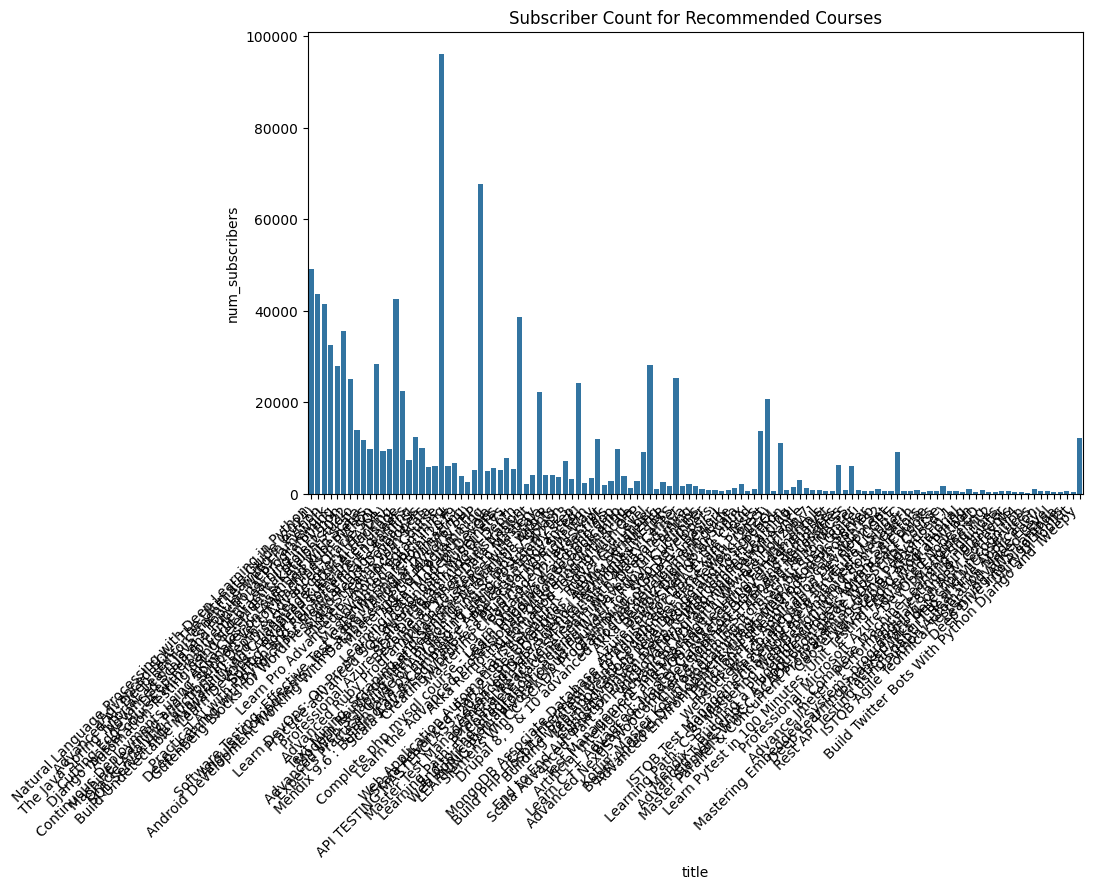

In [95]:
# Visualizing ratings and student numbers for recommended courses

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_courses, x='title', y='num_subscribers')
plt.title('Subscriber Count for Recommended Courses')
plt.xticks(rotation=45, ha='right')
plt.show()

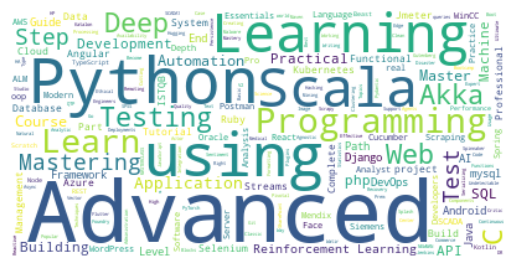

In [96]:
# create a word cloud
wordcloud = WordCloud(background_color="white").generate(' '.join(filtered_courses['title']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()